# Prosper Loans  - Determining Factors of Interest Rates & Loan Amounts
## by Ernest Rowe

## Investigation Overview



## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [101]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Initialize pyplot in offline mode.
py.offline.init_notebook_mode(connected=True)

In [102]:
# Load in the datasets into a pandas dataframes
df = pd.read_csv('./data/prosper_loan_data_clean.csv')
df_map = pd.read_csv('./data/prosper_map_data.csv')

In [103]:
# Function to calculate correlation coefficient between two columns of a DataFrame.
    # Adapted from https://stackoverflow.com/questions/30942577/seaborn-correlation-coefficient-on-pairgrid
def corr(data, x, y, xy=(1.02, 0.90), **kwargs):
    '''
    Takes a DataFrame (data) and two numeric variables (x and y) and annotates the current ax with their correlation
    coefficient. 
    
    xy: Use to change position of annotation.
    '''
    # Calculate the value
    coef = data[[x,y]].corr().iloc[0,1]
    
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=xy, size=32, xycoords=ax.transAxes)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrower Interest Rate vs Credit Score

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

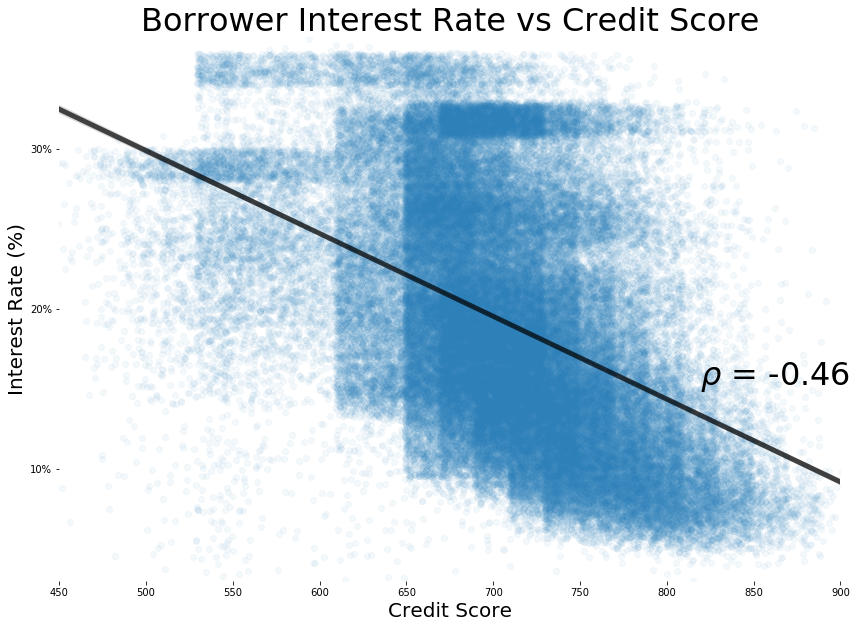

In [122]:
plt.figure(figsize=[14,10])

ax = sns.regplot(data=df, x='CreditScoreRangeUpper', y='BorrowerRate', x_jitter=10, y_jitter=0.01, 
                 scatter_kws={'alpha':0.05}, line_kws={'color':'k','alpha':0.7,'lw':5})

plt.title('Borrower Interest Rate vs Credit Score', fontdict={'fontsize':32})

plt.xlim(450, 900)
plt.xlabel('Credit Score', fontdict={'fontsize':20})

plt.ylabel('Interest Rate (%)', fontdict={'fontsize':20})
locs, labels = plt.yticks()

plt.yticks(locs, ['{:.0%}'.format(x) for x in locs])
plt.ylim(0.03, 0.37)
plt.box(on=False)
corr(df, 'CreditScoreRangeUpper', 'BorrowerRate', xy=(0.82, 0.36));

## Lending Footprint

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

In [105]:
# Initialize pyplot in offline mode.
py.offline.init_notebook_mode(connected=True)

# Create scale for colorbar.
scl = [[0.0, 'rgb(218,218,235)'],[0.1, 'rgb(220,208,212)'],[0.2, 'rgb(223,198,189)'],[0.3, 'rgb(225,189,166)'],
       [0.4, 'rgb(227,179,143)'],[0.5, 'rgb(230,169,120)'],[0.6, 'rgb(232,159,97)'],[0.7, 'rgb(234,149,74)'],
       [0.8, 'rgb(236,140,51)'],[0.9, 'rgb(239,130,28)'],[1.0, 'rgb(241,120,5)']]

# Load data for choropleth map.
data = [dict(
    type='choropleth',
    autocolorscale=False,
    locations=df_map['State Code'],
    z=df_map['Population'], 
    locationmode='USA-states',
    text=df_map['Population Text'],
    hoverinfo='location+text',
    colorscale=scl,
    reversescale=False,
    marker=dict(
        line=dict(
            color='rgb(255,255,255)',
            width=2
        )
    ),
    colorbar=dict(
        title='Residents',
        titlefont=dict(
            family='Arial'
        )
    )
)]

# Make layout for choropleth map.
layout = dict(
    autosize=False,
    width=780,
    height=500,
    images=[dict(
        source='https://i.imgur.com/SDhVixP.png',
        xref='paper', yref='paper',
        x=1.1, y=-0.35,
        sizex=0.5, sizey=0.5,
        xanchor='right', yanchor='bottom'
      )],
    title='Population by State 2014',
    titlefont=dict(
        family='Arial',
        size=28
    ),
    geo=dict(
        scope='usa',
        projection=dict(
            type='albers usa'
        ),
        showlakes=True,
        lakecolor='rgb(255,255,255)'
    )
)

# Create map figure.
fig = dict(data=data, 
           layout=layout)

# Create config dict.
config = {'showLink':False,
          'displayModeBar':False}

# Plot map.
py.offline.iplot(fig, config=config);

Comparing the map from the previous slide, we'll see that the next one looks nearly identical. The calculated $\rho$ value between state population & the number of loans is 0.97.

In [106]:
# Initialize pyplot in offline mode.
py.offline.init_notebook_mode(connected=True)

# Create scale for colorbar.
scl = [[0.0, 'rgb(218,218,235)'],[0.1, 'rgb(220,208,212)'],[0.2, 'rgb(223,198,189)'],[0.3, 'rgb(225,189,166)'],
       [0.4, 'rgb(227,179,143)'],[0.5, 'rgb(230,169,120)'],[0.6, 'rgb(232,159,97)'],[0.7, 'rgb(234,149,74)'],
       [0.8, 'rgb(236,140,51)'],[0.9, 'rgb(239,130,28)'],[1.0, 'rgb(241,120,5)']]

# Load data for choropleth map.
data = [dict(
    type='choropleth',
    autocolorscale=False,
    locations=df_map['State Code'],
    z=df_map['Total'], 
    locationmode='USA-states',
    text=df_map['Text'],
    hoverinfo='location+text',
    colorscale=scl,
    reversescale=False,
    marker=dict(
        line=dict(
            color='rgb(255,255,255)',
            width=2
        )
    ),
    colorbar=dict(
        title='Loans',
        titlefont=dict(
            family='Arial'
        )
    )
)]

# Make layout for choropleth map.
layout = dict(
    autosize=False,
    width=780,
    height=500,
    images=[dict(
        source='https://i.imgur.com/SDhVixP.png',
        xref='paper', yref='paper',
        x=1.1, y=-0.35,
        sizex=0.5, sizey=0.5,
        xanchor='right', yanchor='bottom'
      )],
    title='Loans by State 2006-2014',
    titlefont=dict(
        family='Arial',
        size=28
    ),
    geo=dict(
        scope='usa',
        projection=dict(
            type='albers usa'
        ),
        showlakes=True,
        lakecolor='rgb(255,255,255)'
    )
)

# Create map figure.
fig = dict(data=data, 
           layout=layout)

# Create config dict.
config = {'showLink':False,
          'displayModeBar':False}

# Plot map.
py.offline.iplot(fig, config=config);

## (Visualization 3)



In [107]:
term_categories = ['1 Year', '3 Years', '5 Years']
Term = pd.api.types.CategoricalDtype(categories=term_categories, ordered=True)
df['Term'] = df.Term.astype(Term)

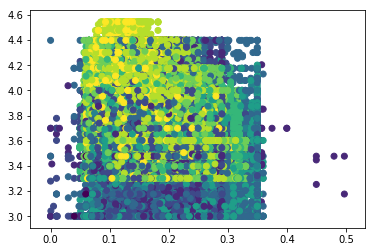

In [121]:
plt.scatter(data=df, x='BorrowerRate', y='LogLoanOriginalAmount', c='OriginationYear')#, palette='viridis_r', alpha=1)
# sns.scatterplot(data=df, x='BorrowerRate', y='LogLoanOriginalAmount', hue='OriginationYear', palette='viridis_r', alpha=1)

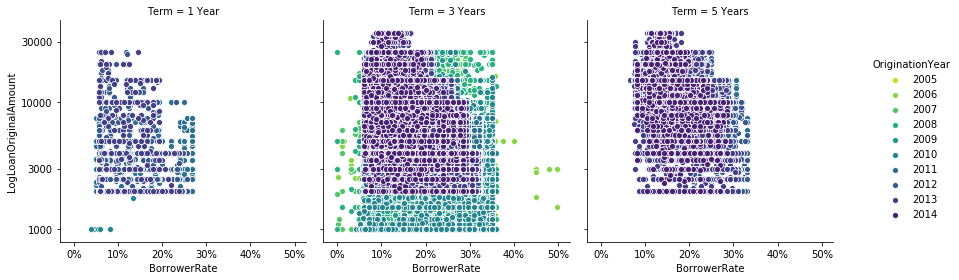

In [113]:
y_labels = [1000, 3000, 10000, 30000]

g = sns.FacetGrid(data=df, col='Term', hue='OriginationYear', height=4,
                margin_titles=True, palette='viridis_r', legend_out=True)
g.map(sns.scatterplot, 'BorrowerRate', 'LogLoanOriginalAmount', alpha=1)

for ax in g.axes[:,0]:
    ax.set_yticks(np.log10(y_labels))
    ax.set_yticklabels(y_labels)

for ax in g.axes[-1,:]:
    ax.set_xticklabels(['{:.0f}%'.format(x*100) for x in ax.get_xticks()]) 

g.add_legend();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!